# Exercise 6 - R: Support Vector Machines

<img width="600" src="http://1.bp.blogspot.com/-EGeuaZkSmCY/TtcfqaeCUCI/AAAAAAAADSo/_mkhp4L-3rc/s1600/Kernel_Machine.png">

## *Part I*: Support Vector Machines

In this exercise, we'll fit support vector machines to three unnamed datasets:
1. Linear Separable
2. Non-linear Separable
3. Non-linear Separable


This exercise is a little different than the previous ones because we are moving away from building everything from scratch and towards using existing libraries.  We will be using [scikit-learn](http://scikit-learn.org/stable/) 
to train our support vector machines and to perform [grid searches](http://scikit-learn.org/stable/modules/grid_search.html) in order to tune the hyperparameters in some cases.


---

Beginning with package imports and data loading

In [1]:
rm(list=ls())  # Clearing all environment variables

suppressPackageStartupMessages({
  library(R.matlab)  # Reads MATLAB/Octave matrices
  library(repr)  # Resizing plot sizes in Jupyter
  library(e1071)  # For building SVMs
  library(ggplot2)
  library(tidyr)
  library(dplyr)
})

theme_update(plot.title = element_text(hjust = 0.5))  # Centers ggplot2 titles
options(repr.plot.width=7, repr.plot.height=4.5)  # Adjusts plot sizes

Warning message:
"package 'R.matlab' was built under R version 3.3.3"Warning message:
"package 'repr' was built under R version 3.3.3"Warning message:
"package 'tidyr' was built under R version 3.3.3"

In [2]:
# Loading the matrices for the three data sets
data1 <- readMat('ex6/ex6data1.mat')
data2 <- readMat('ex6/ex6data2.mat')
data3 <- readMat('ex6/ex6data3.mat')

### Linear Separable Data

### Dataset I

Visualizing the data:

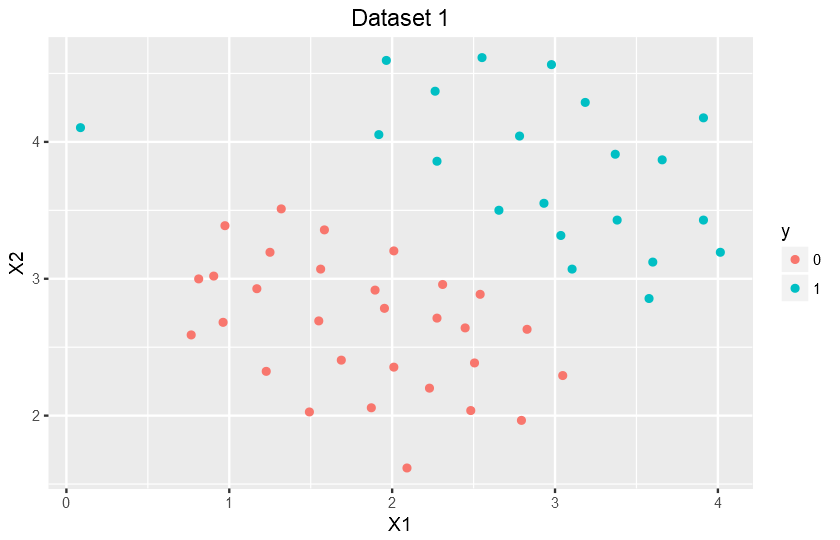

In [3]:
# Assigning X and y for the first data set
X <- data1$X
y <- data1$y
rm(data1)  # Clears from memory

# Putting into a data frame for plots
df <- data.frame(X, y)
df$y <- as.factor(df$y)

# Plotting the original data
ggplot(df) +
  geom_point(aes(x=X1, y=X2, color=y)) +
  ggtitle("Dataset 1")

Notice the outlier in the top left of the graph.  This will largely dictate how our values of C act.  Specifically, if we use a very low value of $C$, the trained support vector machine will be considered a [soft margin classifier](https://nlp.stanford.edu/IR-book/html/htmledition/soft-margin-classification-1.html) and the outlier will be considered a slack variable.  If we use very large values of C, then the trained support vector machine will be considered a [hard margin classifier](https://en.wikipedia.org/wiki/Support_vector_machine#Hard-margin).

#### Fitting and plotting the decision boundary

We'll train the SVM at different values of $C$, and plotting the decision boundary along with the margins.  Here's a typical hard margin support vector machine visual for comparison:

<img src="http://dni-institute.in/blogs/wp-content/uploads/2015/09/SVM-Planes.png">

Notice that the closest points to the decision boundary are called support vectors.  These make support vector machines very memory efficient because you only need to know which samples are support vectors in order to classify additional points in the future.

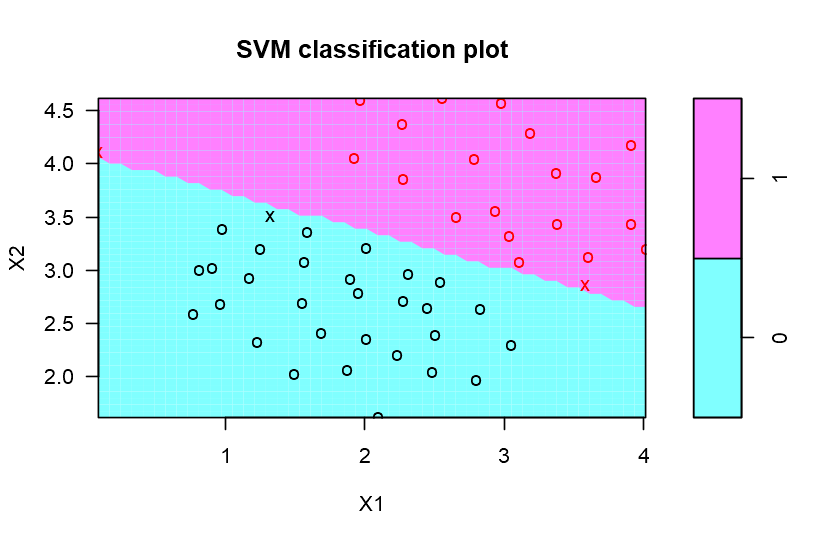

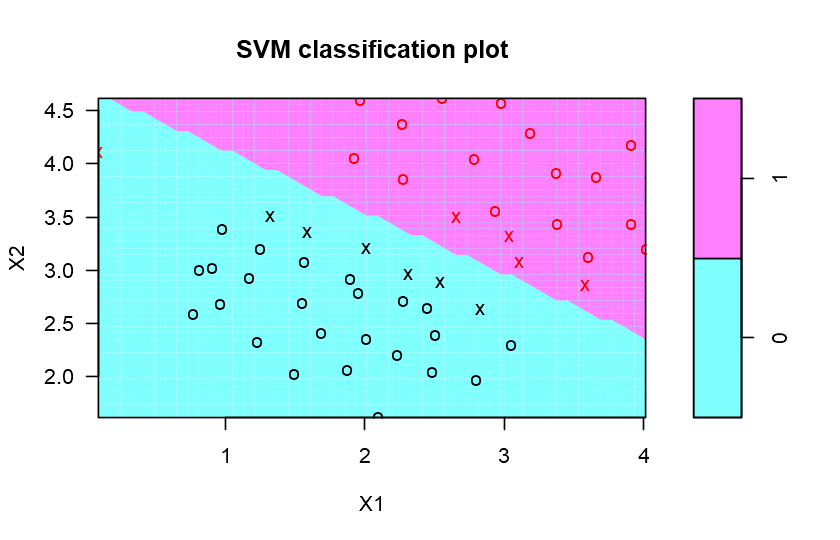

In [4]:
model <- svm(y ~ X2 + X1, data=df,
             kernel="linear",
             cost=100)
plot(model, df)

model <- svm(y ~ X2 + X1, data=df,
             kernel="linear",
             cost=1)
plot(model, df)

Notice two things about this plot:
    
1. The margins are significantly wider with lower values of C
2. C $= 100$ correctly the outlier on the upper left side of the graph, but the others misclassify it.  This is because our model is a soft margin classifier with $C \in [1, 10]$, thus making the outlier a slack variable.  When $C = 100$, it is correctly classified, but our margins are tiny.

### SVM with Gaussian Kernels (Non-linear Separable Data)

The [kernel method](https://en.wikipedia.org/wiki/Kernel_method) is a way of finding a linearly separable [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) to separate classes in a nonlinear dataset by mapping it to a higher plane.

<img width="600px" src="http://i2.wp.com/blog.hackerearth.com/wp-content/uploads/2017/02/kernel.png">

[Here](https://www.youtube.com/watch?v=3liCbRZPrZA) is a video demonstrating the kernel method with a polynomial kernel.

I'll create a function for the Gaussian kernel by itself, but scikit-learn's [SVC (Support Vector Classifier)](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) has this kernel built in as the 'rbf' ([radial basis function](https://en.wikipedia.org/wiki/Radial_basis_function)) kernel.  You can plug custom kernels into the SVC function, but we'll go with the rbf kernel for the sake of simplicity.

### Dataset II

Unlike the other datasets, we are provided with specific parameters for fitting a support vector machine.

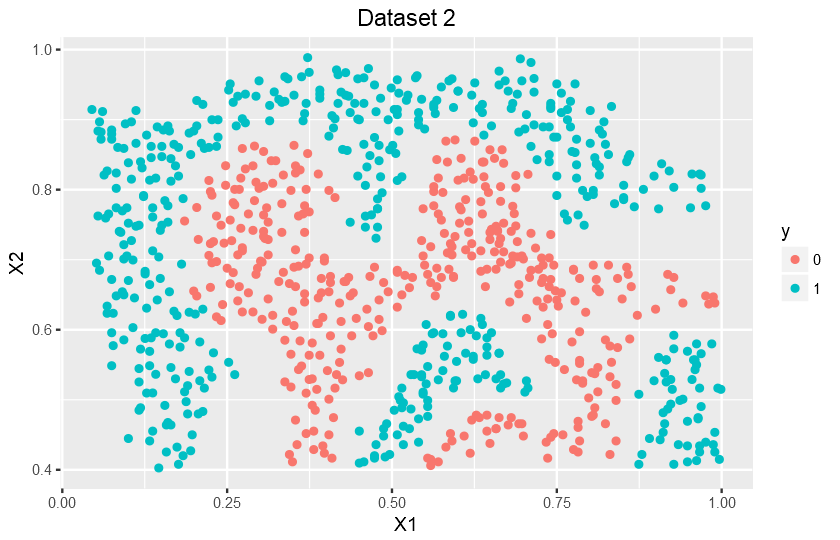

In [5]:
# Assigning X and y for the first data set
X <- data2$X
y <- data2$y
rm(data2)  # Clears from memory

# Putting into a data frame for plots
df <- data.frame(X, y)
df$y <- as.factor(df$y)

# Plotting the original data
ggplot(df) +
  geom_point(aes(x=X1, y=X2, color=y)) +
  ggtitle("Dataset 2")

**Gaussian Kernel**

One way to think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples, $(x^{(i)}, x^{(j)})$

$$K_{gaussian}(x^{(i)}, x^{(j)}) = \text{exp} \Big(- \frac{\|x^{(i)} - x^{(j)\|^2}}{2\sigma^2} \Big) = \text{exp} \Bigg(- \frac{\sum_{k=1}^n (x_k^{(i)} - x_k^{(j)})^2}{2\sigma^2} \Bigg)$$

#### Fitting and plotting the decision boundary

One thing to note is that SVC's gamma parameter takes the place of the sigma parameter in our Gaussian kernel function.  They're in different units, so we just have to multiply the sigmas provided in the exercise by 100.

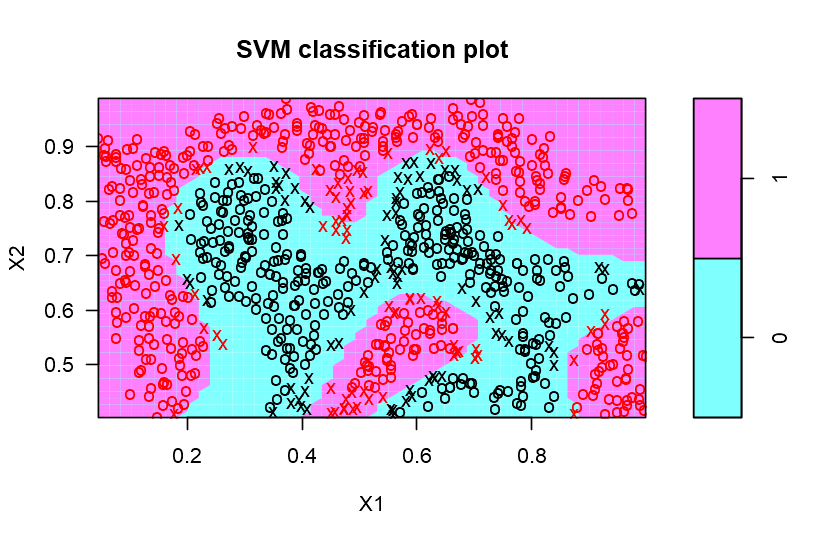

In [6]:
model <- svm(y ~ X2 + X1, data=df,
            cost=100)

plot(model, df)

### Dataset III

Rather than being provided with the parameters for this data set, we're provided with a set of parameters that we must test on the validation set.  In order to find the optimal parameters, we need to try all combinations of the set of parameters with a [grid search](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning).

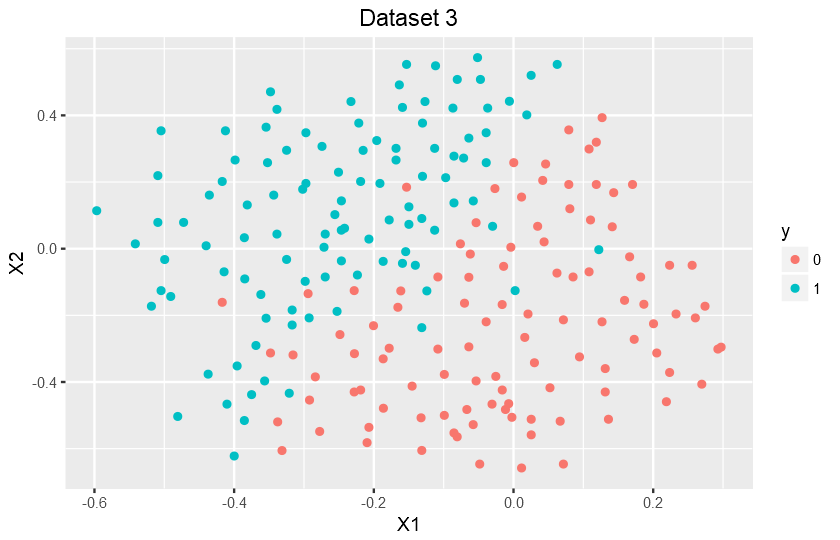

In [7]:
# Assigning X and y for the first data set
X <- data3$X
y <- data3$y
Xval <- data3$Xval
yval <- data3$yval
rm(data3)  # Clears from memory

# Putting into a data frame for plots
df <- data.frame(X, y)
df$y <- as.factor(df$y)

# Plotting the original data
ggplot(df) +
  geom_point(aes(x=X1, y=X2, color=y)) +
  ggtitle("Dataset 3")

#### Grid Search

We're provided with 8 values for $C$ and 8 values for $\sigma$, which results in $8^2 = 64$ combinations.

We'll use scikit-learn's [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function to accomplish this.

#### Fitting and plotting the decision boundary

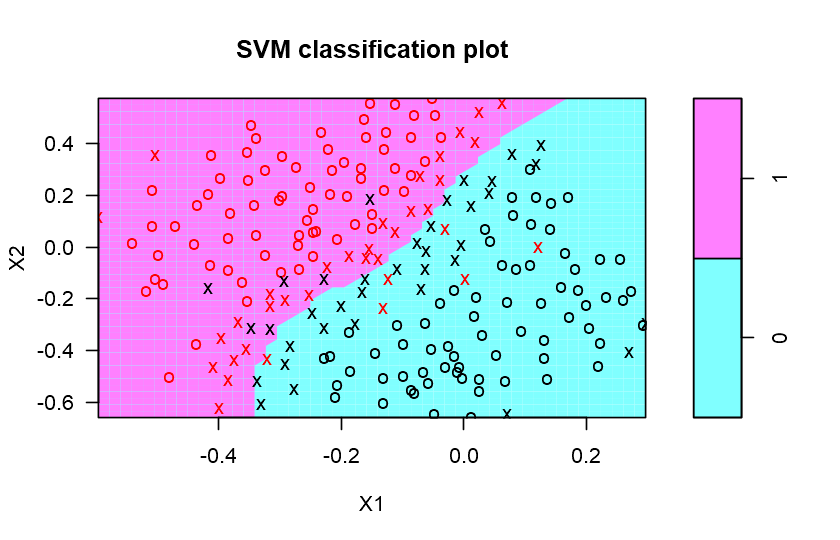

In [8]:
model <- svm(y ~ X2 + X1, data=df,
            cost=1)

plot(model, df)

---

##  *Part II:* Spam Classification

For this part, the email processing has already been accomplished, so we will only be training the model using the processed data.

Before we do, here are processing steps to give a better idea of the data:

1. **Lower-casing (normalizing):** Ignores capitalization to reduce the overall feature space
2. **Stripping HTML:** Removes unnecessary HTML tags
3. **Normalizing URLs:** Changes all URLs to "httpaddr"
4. **Normalizing Email Addresses:** Changes all email addresses to "emailaddr"
5. **Normalizing Numbers:** Changes all numbers to "number"
6. **Normalizing Dollars:** Changes all dollar signs (\$) to "dollar"
7. ** Word Stemming:** Reduces words to their stem (e.x. discounted $\rightarrow$ discount)
8. **Removal of non-words:** Removes punctuation, non-words, and trims white spaces

After that, each result was assigned an index.  Here is an example of the first 20 words along with their indexes:

Lastly, our training and testing sets were created by one-hot encoding each word:

|X   | 1 (aa) | 2 (ab) | 3 (abil) | 4 (abl) | ... | 1899 (zip) |
|----|--------|--------|----------|---------|-----|------------|  
|1   | 0      | 1      | 0        | 0       | ... | 1          |
|2   | 1      | 0      | 0        | 0       | ... | 0          |
|... | ...    | ...    | ...      | ...     | ... | ...        |
|4000| 0      | 0      | 1        | 0       | ... | 0          |

### Training SVM for Spam Classification

We'll begin with a grid search for finding optimal parameters for our model.  I won't use as many parameters as we did in part I because these models will take significantly longer to fit due to our number of parameters, $n = 1899$ instead of $n=2$.

We'll also use the linear kernel (also known as no kernel) since $n$ (the number of features) is so high.  As a reminder, it is recommended to use the linear kernel when $n$ is high and $m$ (the number of samples) is low, and the Gaussian kernel is recommended when $n$ is small and $m$ is large.

The other advantage of using a linear kernel in this case is that it gives us coefficients which tells us the most used words in spam emails.

### Top Predictors for Spam